#Data Preparation

In [1]:
!pip install pandas
!pip install countryinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.2/602.2 kB 14.8 MB/s eta 0:00:00


In [2]:
#Calling libraries
import urllib
import pandas as pd
import numpy as np

In [3]:
# Vilém's matplotlib setup
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler

FONT_MONOSPACE = {'fontname': 'monospace'}
MARKERS = "o^s*DP1"
COLORS = [
    "darkseagreen",
    "salmon",
    "cornflowerblue",
    "seagreen",
    "orange",
    "lightpink",
    "dimgray",
]
COLORS_FIRE = ["#9c2963", "#282e9b", "#fb9e07"]

mpl.rcParams['axes.prop_cycle'] = cycler(color=COLORS)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 7
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams["hatch.linewidth"] = 5

# mpl.rc('text', usetex=True)
mpl.rcParams['font.family'] = "serif"


In [4]:
#Retrieving files
urllib.request.urlretrieve("https://github.com/Data-Engineering-and-Semantics/OpenKGBiblio/blob/main/metadata/source_2021-2022.csv?raw=true", "source_2021-2022.csv")
urllib.request.urlretrieve("https://github.com/Data-Engineering-and-Semantics/OpenKGBiblio/blob/main/metadata/source_2019-2020.csv?raw=true", "source_2019-2020.csv")
urllib.request.urlretrieve("https://github.com/Data-Engineering-and-Semantics/OpenKGBiblio/blob/main/metadata/source_2017-2018.csv?raw=true", "source_2017-2018.csv")
urllib.request.urlretrieve("https://github.com/Data-Engineering-and-Semantics/OpenKGBiblio/blob/main/metadata/source_2015-2016.csv?raw=true", "source_2015-2016.csv")
urllib.request.urlretrieve("https://github.com/Data-Engineering-and-Semantics/OpenKGBiblio/blob/main/metadata/source_2013-2014.csv?raw=true", "source_2013-2014.csv")

('source_2013-2014.csv', <http.client.HTTPMessage at 0x7fc6de968f70>)

In [5]:
#Creating dataframes
df2021_22 = pd.read_csv("source_2021-2022.csv")
df2019_20 = pd.read_csv("source_2019-2020.csv")
df2017_18 = pd.read_csv("source_2017-2018.csv")
df2015_16 = pd.read_csv("source_2015-2016.csv")
df2013_14 = pd.read_csv("source_2013-2014.csv")

In [6]:
#Merging dataframes
df = df2021_22
df = df.append(df2019_20, ignore_index=True)
df = df.append(df2017_18, ignore_index=True)
df = df.append(df2015_16, ignore_index=True)
df = df.append(df2013_14, ignore_index=True)

<ipython-input-6-9662cd624eff>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2019_20, ignore_index=True)
<ipython-input-6-9662cd624eff>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2017_18, ignore_index=True)
<ipython-input-6-9662cd624eff>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2015_16, ignore_index=True)
<ipython-input-6-9662cd624eff>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2013_14, ignore_index=True)


In [7]:
# hotfix by Vilém

df["Cited by fixed"] = df["Cited by"].fillna(0)

In [8]:
#Describing the final dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4445 entries, 0 to 4444
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        4445 non-null   object 
 1   Author(s) ID                   4444 non-null   object 
 2   Title                          4445 non-null   object 
 3   Year                           4445 non-null   int64  
 4   Source title                   4445 non-null   object 
 5   Volume                         3295 non-null   object 
 6   Issue                          1439 non-null   object 
 7   Art. No.                       1004 non-null   object 
 8   Page start                     3313 non-null   object 
 9   Page end                       3290 non-null   object 
 10  Page count                     232 non-null    float64
 11  Cited by                       3068 non-null   float64
 12  DOI                            3502 non-null   o

#Overall Analysis

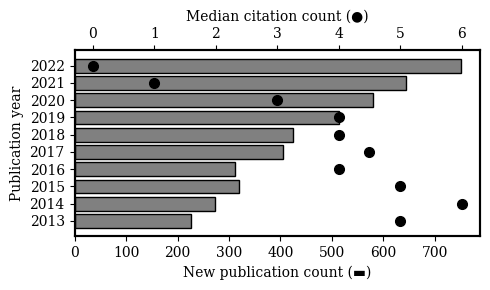

In [ ]:
#Figure 1: Publications per year
vals = list(df["Year"].value_counts()[:10].to_dict().items())

vals.sort(key=lambda x: x[0], reverse=True)

plt.figure(figsize=(5,3))
ax1 = plt.gca()
ax2 = ax1.twiny()

ax1.barh(
    [x for x,y in vals],
    [y for x,y in vals],
    edgecolor="black",
    color="gray"
)


for year_i, year in enumerate([x for x,y in vals]):
  val = df["Cited by fixed"][df["Year"] == year].median()
  ax2.scatter(
      val,
      year,
      color="black"
  )
  
ax1.set_xlabel("New publication count (▬)")
ax1.set_ylabel("Publication year")
ax2.set_xlabel("Median citation count (●)")

ax1.set_yticks(
    [x for x,y in vals],
    [x for x,y in vals]
)

plt.tight_layout()
plt.savefig("figures/publication_year.eps")
plt.show();

In [ ]:
def plotperyear(variable):
  best = df[variable].value_counts()[0:20].index.tolist()
  best.reverse()
  df.groupby(variable)["Year"].value_counts().loc[best,:].round(1).unstack(level=1).plot(kind='barh', stacked=True);

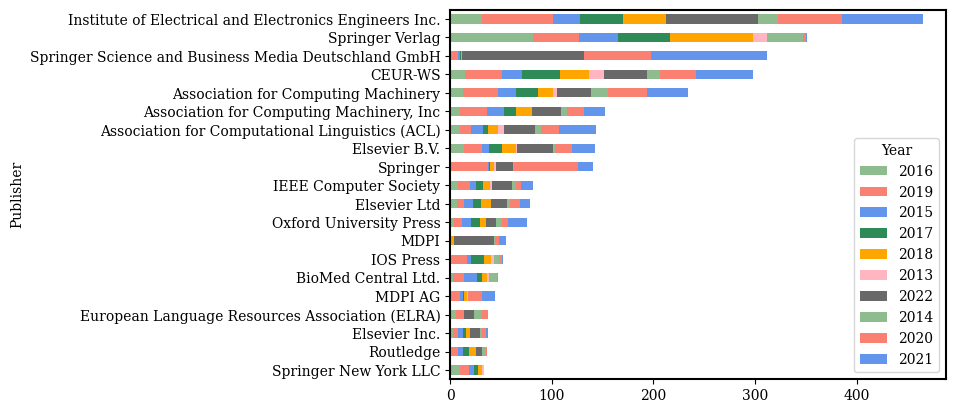

In [ ]:
#Figure 3: Publishers
plotperyear("Publisher")

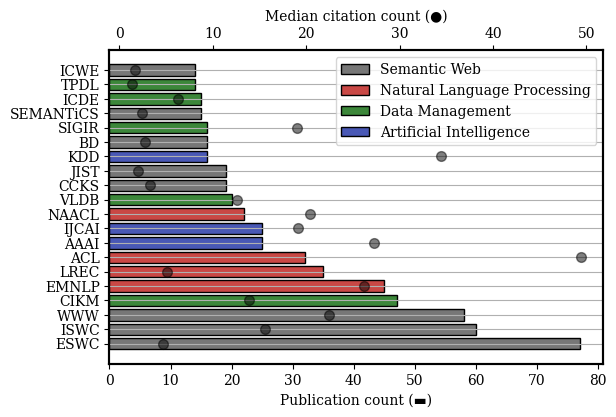

In [ ]:
#Figure 4: Conference name

def get_name(x):
  segments = x.split(", ")
  segments = ["".join(c for c in segment if c.isupper()) for segment in segments]
  segments = [s for s in segments if s]
  out = segments[-1]

  # manual hotfix
  if out == "SEMANTCS":
    out = "SEMANTiCS"
  if out == "NAACLHLT":
    out = "NAACL"
  return out

values = (
    df["Conference name"]
    .apply(lambda x: get_name(x) if type(x) == str else x)
    .value_counts()[:20].to_dict()
)
df["Conference name Short"] = (
    df["Conference name"]
    .apply(lambda x: get_name(x) if type(x) == str else x)
)
conference_names_unique = list(df["Conference name Short"].value_counts()[:20].to_dict().keys())
citation_counts = {
    conference_name:df["Cited by fixed"][df["Conference name Short"] == conference_name].mean()
    for conference_name in conference_names_unique
}

CONF_TYPE = {
    "ACL": "Natural Language Processing",
    "EMNLP": "Natural Language Processing",
    "LREC": "Natural Language Processing",
    "NAACL": "Natural Language Processing",
    "CIKM": "Data Management",
    "SIGIR": "Data Management",
    "VLDB": "Data Management",
    "ICDE": "Data Management",
    "TPDL": "Data Management",
    "IJCAI": "Artificial Intelligence",
    "AAAI": "Artificial Intelligence",
    "KDD": "Artificial Intelligence",
    "ESWC": "Semantic Web",
    "ISWC": "Semantic Web",
    "WWW": "Semantic Web",
    "JIST": "Semantic Web",
    "CCKS": "Semantic Web",
    "BD": "Semantic Web",
    "SEMANTiCS": "Semantic Web",
    "ICSC": "Semantic Web",
    "ICWE": "Semantic Web",
}

TYPE_COLOR = {
    "Natural Language Processing": '#C94845',
    "Semantic Web": '#777777',
    "Data Management": '#3c873a',
    "Artificial Intelligence": '#4958B5',
}

conf_ordering = {x:i for i,(x,y) in enumerate(values.items())}

plt.figure(figsize=(6, 4))
ax1 = plt.gca()
ax2 = ax1.twiny()
# plot publication count
for conf_type in set(CONF_TYPE.values()):
  ax1.barh(
      [i for i, (x, y) in enumerate(values.items()) if CONF_TYPE[x] == conf_type],
      [y for i, (x, y) in enumerate(values.items()) if CONF_TYPE[x] == conf_type],
      color=TYPE_COLOR[conf_type],
      label=conf_type,
      edgecolor="black"
  )

# plot citation average
ax2.scatter(
    [citation_counts[x] for x in conference_names_unique],
    [conf_ordering[x] for x in conference_names_unique],
    color="black",
    alpha=0.5,
)

ax1.set_yticks(
    range(len(values)),
    [x for x, y in values.items()],
)
ax1.set_xlabel("Publication count (▬)")
ax2.set_xlabel("Median citation count (●)")
plt.tight_layout(pad=0.1)

# only legend 1 bears the axes
ax1.legend()
ax1.grid(axis="y")
plt.savefig("figures/conference_type.eps")
plt.show()

None;

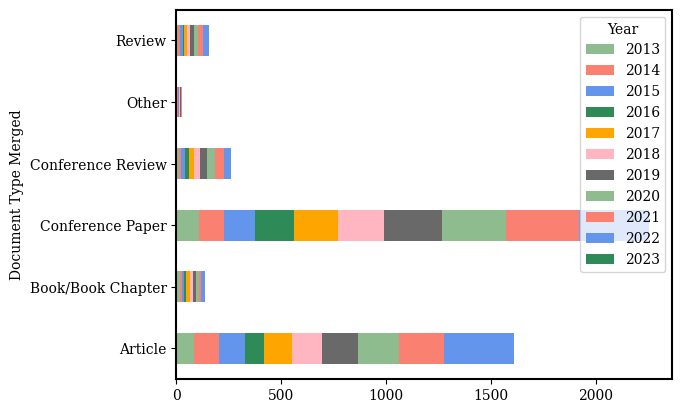

In [ ]:
#Figure 5: Document Types

df["Document Type Merged"] = df["Document Type"]
for m in ["Book Chapter", "Book"]:
  df["Document Type Merged"][df["Document Type Merged"]==m] = "Book/Book Chapter"
for m in ["Short Survey", "Letter", "Erratum", "Data Paper", "Retracted", "Note", "Editorial"]:
  df["Document Type Merged"][df["Document Type Merged"]==m] = "Other"

plotperyear("Document Type Merged")

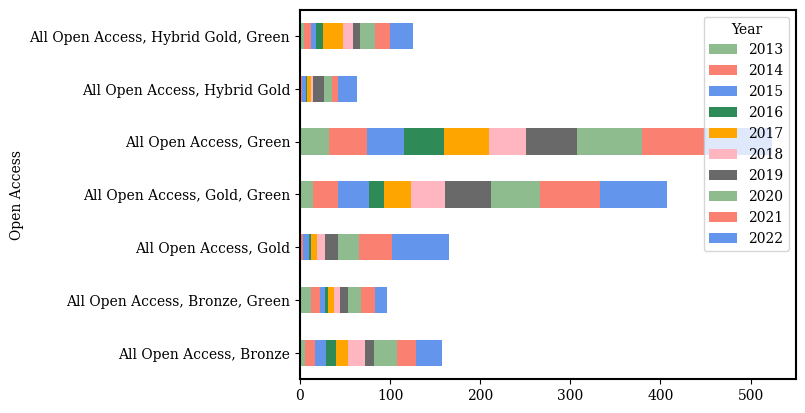

In [ ]:
#Figure 7: Open Access
plotperyear("Open Access")

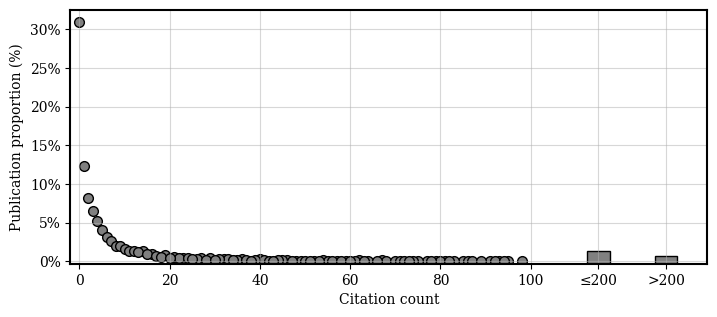

Zero citations 30.97862767154106
Less than 5 citations 67.33408323959506
More than 20 citations 11.923509561304838
More than 100 citations 2.1147356580427448


In [ ]:
# Figure 8: Cited By

papers_total = df["Cited by fixed"].count()
values_100 = df["Cited by fixed"][df["Cited by fixed"]<=100].value_counts().to_dict()
values_200 = df["Cited by fixed"][(df["Cited by fixed"]<=200) & (df["Cited by fixed"]>100)].value_counts().sum()
values_rest = df["Cited by fixed"][(df["Cited by fixed"]>200)].value_counts().sum()

plt.figure(figsize=(7,3))
plt.grid(alpha=0.5)
plt.scatter(
    [x for x,y in values_100.items()],
    [y/papers_total*100 for x,y in values_100.items()],
    color="gray",
    edgecolor="black",
)
plt.bar(
    [115, 130],
    [values_200/papers_total*100+0.3, values_rest/papers_total*100+0.3],
    width=5,
    bottom=-0.3,
    color="gray",
    edgecolor="black"
)
plt.xticks(
    list(range(0, 101, 20)) + [115, 130],
    list(range(0, 101, 20)) + ["≤200", ">200"],
)
plt.yticks(
    range(0, 35, 5),
    [f"{x}%" for x in range(0, 35, 5)]
)
plt.ylim(-0.3, None)
plt.xlim(-2, None)
plt.xlabel("Citation count")
plt.ylabel("Publication proportion (%)")
plt.tight_layout(pad=0.1)
plt.savefig("figures/citation_count.eps")
plt.show()

# .rename_axis('Cited By').reset_index(name='Publications').plot.scatter(x='Cited By', y='Publications');

print("Zero citations", df["Cited by fixed"][df["Cited by fixed"]==0].count()/papers_total*100)
print("Less than 5 citations", df["Cited by fixed"][df["Cited by fixed"]<=5].count()/papers_total*100)
print("More than 20 citations", df["Cited by fixed"][df["Cited by fixed"]>=20].count()/papers_total*100)
print("More than 100 citations", df["Cited by fixed"][df["Cited by fixed"]>=100].count()/papers_total*100)

In [ ]:
#Table 1: Most cited publications
s = np.r_[0, 2:5, 11]
df.sort_values("Cited by", axis=0, ascending=False).iloc[:20, s]

,Authors,Title,Year,Source title,Cited by
3315,"Wang M., Carver J.J., Phelan V.V., Sanchez L.M...",Sharing and community curation of mass spectro...,2016,Nature Biotechnology,1854.0
3316,"Lehmann J., Isele R., Jakob M., Jentzsch A., K...","DBpedia - A large-scale, multilingual knowledg...",2015,Semantic Web,1715.0
3947,"Vrandečić D., Krötzsch M.",Wikidata: A free collaborative knowledgebase,2014,Communications of the ACM,1617.0
2487,"Wang X., Peng Y., Lu L., Lu Z., Bagheri M., Su...",ChestX-ray8: Hospital-scale chest X-ray databa...,2017,Proceedings - 30th IEEE Conference on Computer...,1541.0
3948,"Croft D., Mundo A.F., Haw R., Milacic M., Weis...",The Reactome pathway knowledgebase,2014,Nucleic Acids Research,1176.0
3949,"Pawson A.J., Sharman J.L., Benson H.E., Faccen...",The IUPHAR/BPS Guide to PHARMACOLOGY: An exper...,2014,Nucleic Acids Research,777.0
2488,"Duan X., Sun H., Wang S.",Metal-Free Carbocatalysis in Advanced Oxidatio...,2018,Accounts of Chemical Research,716.0
2489,Paulheim H.,Knowledge graph refinement: A survey of approa...,2017,Semantic Web,667.0
3950,"Wong G., Greenhalgh T., Westhorp G., Buckingha...",RAMESES publication standards: Realist syntheses,2013,BMC Medicine,616.0
2490,"Alexander S.P.H., Fabbro D., Kelly E., Marrion...",THE CONCISE GUIDE TO PHARMACOLOGY 2017/18: Enz...,2017,British Journal of Pharmacology,584.0


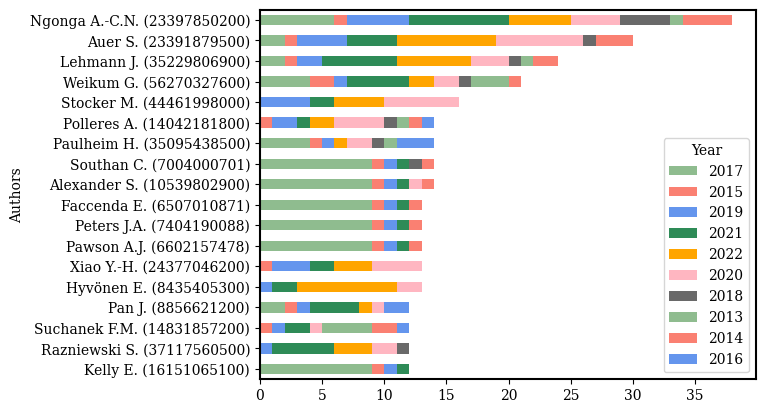

In [ ]:
#Figure 9: Most published authors with their Scopus IDs
from collections import Counter
author_dict01 = []
author_dict = df[["Author(s) ID", "Authors"]]
for n in range(len(author_dict)):
  x = list(zip(str(author_dict["Author(s) ID"][n]).split(";"), author_dict["Authors"][n].split(", ")))
  author_dict01 += x
author_dict01 = list(dict.fromkeys(author_dict01))
author_id = dict(author_dict01)


authors = []
df_authors = df[["Author(s) ID", "Year"]]
for i in range(len(df_authors)):
  for j in str(df_authors["Author(s) ID"][i]).split(";"):
    authors.append([author_id[j]+" ("+j+")",df_authors["Year"][i]])
df_auth = pd.DataFrame(authors, columns =['Authors', 'Year'])
best_r = df_auth["Authors"].value_counts()[2:20]
best = best_r.index.tolist()
best.reverse()
df_auth.groupby("Authors")["Year"].value_counts().loc[best,:].round(1).unstack(level=1).plot(kind='barh', stacked=True);

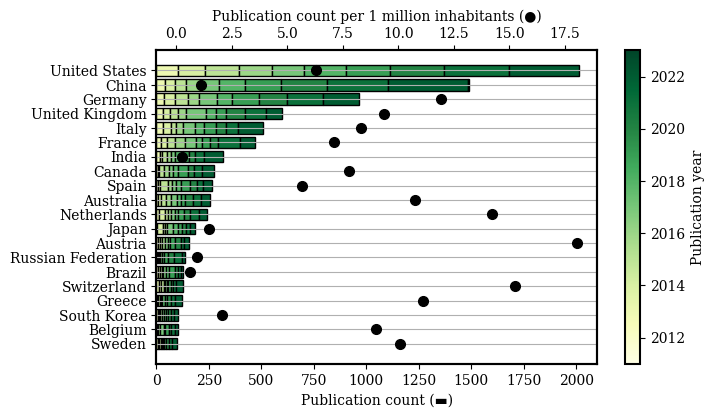

In [ ]:
#Figure 10: Most published countries
from countryinfo import CountryInfo
import math

aff = []
df_aff = df[["Affiliations", "Year"]]
for i in range(len(df_aff)):
  for j in str(df_aff["Affiliations"][i]).split("; "):
    if (j != "nan"): aff.append([j.split(", ")[-1],df_aff["Year"][i]])
df_affil = pd.DataFrame(aff, columns =['Affiliation', 'Year'])
best_r = df_affil["Affiliation"].value_counts()[0:20]
best = best_r.index.tolist()
best.reverse()
vals = df_affil.groupby("Affiliation")["Year"].value_counts().loc[best,:].round(1).unstack(level=1).to_dict()

cmap = mpl.colormaps.get_cmap("YlGn")

min_year = 2011
max_year = 2023

def get_year_color(year):
  return cmap((year-min_year)/(max_year-min_year))

years = list(set(vals.keys()))
years.sort()
countries = set(country for year in years for country in vals[year])

plt.figure(figsize=(7, 4))
ax1 = plt.gca()
ax2 = ax1.twiny()
for country_i, country in enumerate(best):
  last_pos = 0
  for year in years:
    if math.isnan(vals[year][country]):
      continue
    ax1.barh(
        country_i,
        vals[year][country],
        left=last_pos,
        color=get_year_color(year),
        edgecolor="black"
    )
    last_pos += vals[year][country]
  info = CountryInfo(country)
  # print(country,last_pos, info.population(), last_pos/info.population())
  ax2.scatter(
      last_pos/info.population()*1000000,
      country_i,
      color="black"
  )

ax1.set_yticks(
    range(len(best)),
    best,
)
ax1.set_xlabel("Publication count (▬)")
ax2.set_xlabel("Publication count per 1 million inhabitants (●)")

ax1.set_xlim(None, 2100)

norm=plt.Normalize(min_year, max_year)
# ghost plot to get colorbar
plt.scatter(
    [0], [0], c=[min_year], cmap=cmap, norm=norm,
    # set markersize to 0
    s=0,
  )

plt.colorbar().set_label("Publication year")

ax1.grid(axis="y")
plt.tight_layout(pad=0.1)
plt.savefig("figures/publication_by_country.eps")
plt.show()

None;

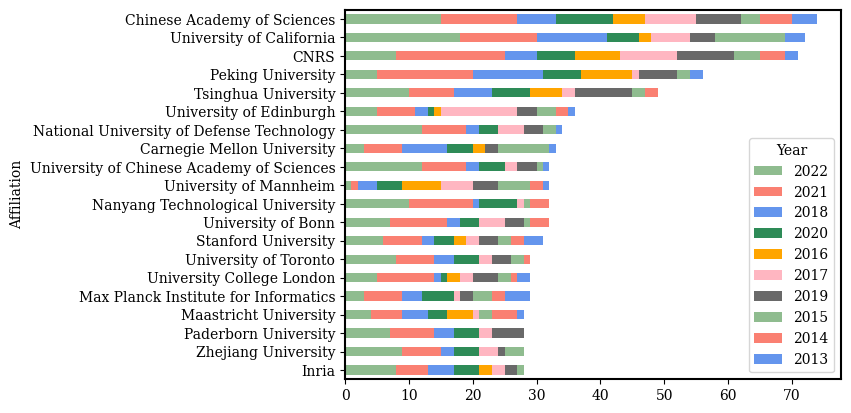

In [ ]:
#Figure 11: Most published institutions
aff = []
df_aff = df[["Affiliations", "Year"]]
for i in range(len(df_aff)):
  for j in str(df_aff["Affiliations"][i]).split("; "):
    for k in j.split(", "):
      if k != "nan": aff.append([k,df_aff["Year"][i]])
df_affil = pd.DataFrame(aff, columns =['Affiliation', 'Year'])
choice = np.r_[30, 32:34, 51, 59, 89, 92, 97, 100:102, 105:107, 108, 117, 120:122, 123:126, 128]
best_r = df_affil["Affiliation"].value_counts()[choice]
best = best_r.index.tolist()
best.reverse()
df_affil.groupby("Affiliation")["Year"].value_counts().loc[best,:].round(1).unstack(level=1).plot(kind='barh', stacked=True);

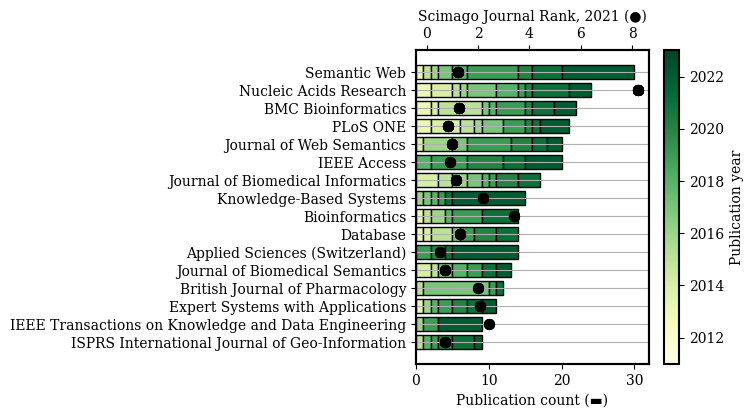

In [ ]:
#Figure 10: Most published journals
import math

aff = []
df_aff = df[["Source title", "Year"]]
choice = np.r_[6, 8:11, 12:14, 16, 23:27, 28, 32, 35, 38:40]
best_r = df_aff["Source title"].value_counts()[choice]
best = best_r.index.tolist()
best.reverse()
vals = df_aff.groupby("Source title")["Year"].value_counts().loc[best,:].round(1).unstack(level=1).to_dict()

cmap = mpl.colormaps.get_cmap("YlGn")

min_year = 2011
max_year = 2023

def get_year_color(year):
  return cmap((year-min_year)/(max_year-min_year))

years = list(set(vals.keys()))
years.sort()
countries = set(country for year in years for country in vals[year])

plt.figure(figsize=(7, 4))
ax1 = plt.gca()
ax2 = ax1.twiny()
for country_i, country in enumerate(best):
  last_pos = 0
  for year in years:
    if math.isnan(vals[year][country]):
      continue
    ax1.barh(
        country_i,
        vals[year][country],
        left=last_pos,
        color=get_year_color(year),
        edgecolor="black"
    )
    last_pos += vals[year][country]
    #sjr = {"Semantic Web": 1.242, "Nucleic Acids Research": 8.241, "BMC Bioinformatics": 1.246, "PLoS ONE": 0.852, "Journal of Web Semantics": 0.980, "IEEE Access": 0.927, 
    #       "Journal of Biomedical Informatics": 1.128, "Knowledge-Based Systems": 2.192, "Bioinformatics": 3.4, "Database": 1.282, "Applied Sciences (Switzerland)": 0.507,
    #      "Journal of Biomedical Semantics": 0.719, "British Journal of Pharmacology": 1.993, "Expert Systems with Applications": 2.07, "IEEE Transactions on Knowledge and Data Engineering" : 2.431,
    #      "ISPRS International Journal of Geo-Information": 0.721}
    sjr = [1.242, 8.241, 1.246, 0.852, 0.980, 0.927, 1.128, 2.192, 3.4, 1.282, 0.507, 0.719, 1.993, 2.07, 2.431, 0.721]
    sjr.reverse()
    ax2.scatter(
      sjr[country_i],
      country_i,
      color="black"
    )   

ax1.set_yticks(
    range(len(best)),
    best,
)
ax1.set_xlabel("Publication count (▬)")

ax1.set_xlim(None, 32)
ax2.set_xlabel("Scimago Journal Rank, 2021 (●)")


norm=plt.Normalize(min_year, max_year)
# ghost plot to get colorbar
plt.scatter(
    [0], [0], c=[min_year], cmap=cmap, norm=norm,
    # set markersize to 0
    s=0,
  )

plt.colorbar().set_label("Publication year")

ax1.grid(axis="y")
plt.tight_layout(pad=0.1)
plt.savefig("figures/publication_by_journal.eps")
plt.show()

None;

<ipython-input-10-ad88229d0f6e>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_affil.append(pd.DataFrame(aff, columns =["Keywords", 'Year']), ignore_index=True)


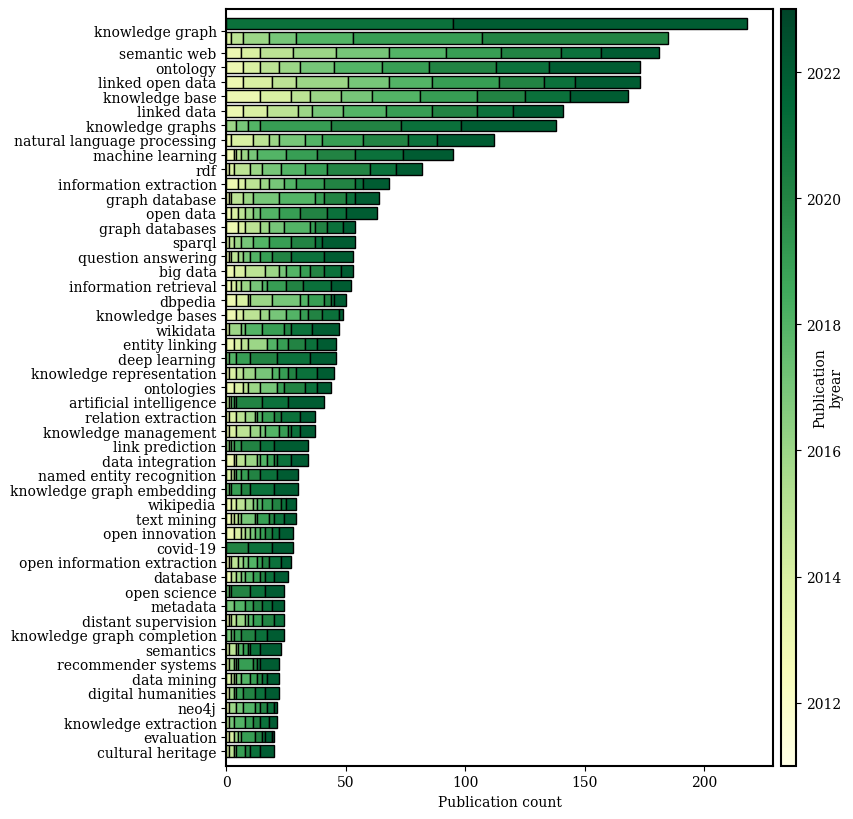

In [10]:
#Figure 10: Most published keywords
import math

aff = []
df_aff = df[["Author Keywords", "Year"]]
for i in range(len(df_aff)):
  for j in str(df_aff["Author Keywords"][i]).lower().split("; "):
      aff.append([j,df_aff["Year"][i]])
df_affil = pd.DataFrame(aff, columns =["Keywords", 'Year'])

aff = []
df_aff = df[["Index Keywords", "Year"]]
for i in range(len(df_aff)):
  for j in str(df_aff["Index Keywords"][i]).lower().split("; "):
      aff.append([j,df_aff["Year"][i]])
df_affil.append(pd.DataFrame(aff, columns =["Keywords", 'Year']), ignore_index=True)

best_r = df_affil["Keywords"].value_counts()[1:51]
best = best_r.index.tolist()
best.reverse()
vals = df_affil.groupby("Keywords")["Year"].value_counts().loc[best,:].round(1).unstack(level=1).to_dict()

cmap = mpl.colormaps.get_cmap("YlGn")

min_year = 2011
max_year = 2023

def get_year_color(year):
  return cmap((year-min_year)/(max_year-min_year))

years = list(set(vals.keys()))
years.sort()
countries = set(country for year in years for country in vals[year])

plt.figure(figsize=(9, 8))
ax1 = plt.gca()
for country_i, country in enumerate(best):
  last_pos = 0
  for year in years:
    if country == "knowledge graph" and year == 2021:
      country_i += 1
      last_pos = 0
    # print(country)
    if math.isnan(vals[year][country]):
      continue
    ax1.barh(
        country_i,
        vals[year][country],
        left=last_pos,
        color=get_year_color(year),
        edgecolor="black"
    )
    last_pos += vals[year][country]

#
ytick_loc = list(range(len(best)))
ytick_loc[-1] += 0.5
ax1.set_yticks(ytick_loc, best)
ax1.set_xlabel("Publication count")

# ax1.set_xlim(None, 500)

norm=plt.Normalize(min_year, max_year)
# ghost plot to get colorbar
plt.scatter(
    [0], [0], c=[min_year], cmap=cmap, norm=norm,
    # set markersize to 0
    s=0,
  )

plt.colorbar(aspect=50, anchor=(-0.3, 0.5)).set_label("Publication\nbyear", labelpad=-20)
plt.ylim(-1, 51)

plt.tight_layout(pad=0)
plt.savefig("figures/publication_by_keyword.eps")
plt.show()

None;

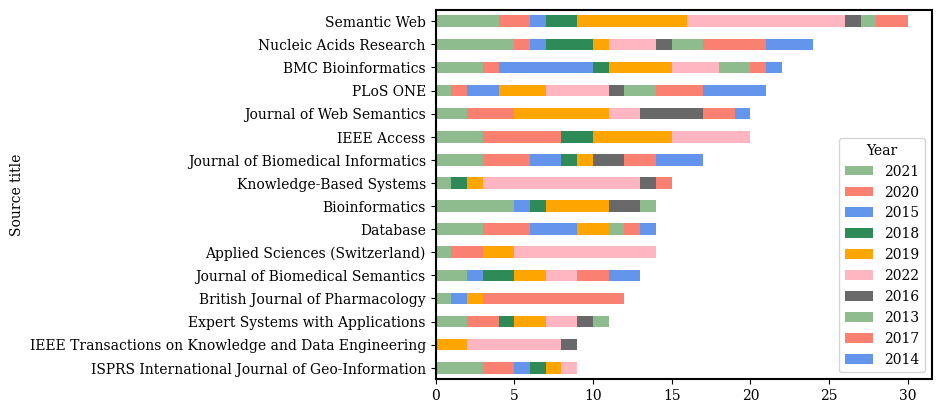

In [ ]:
#Figure 2: Source titles
aff = []
df_aff = df[["Source title", "Year"]]
choice = np.r_[6, 8:11, 12:14, 16, 23:27, 28, 32, 35, 38:40]
best_r = df_aff["Source title"].value_counts()[choice]
best = best_r.index.tolist()
best.reverse()
df_aff.groupby("Source title")["Year"].value_counts().loc[best,:].round(1).unstack(level=1).plot(kind='barh', stacked=True);

<ipython-input-74-e5655d891fe2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_affil.append(pd.DataFrame(aff, columns =["Keywords", 'Year']), ignore_index=True)


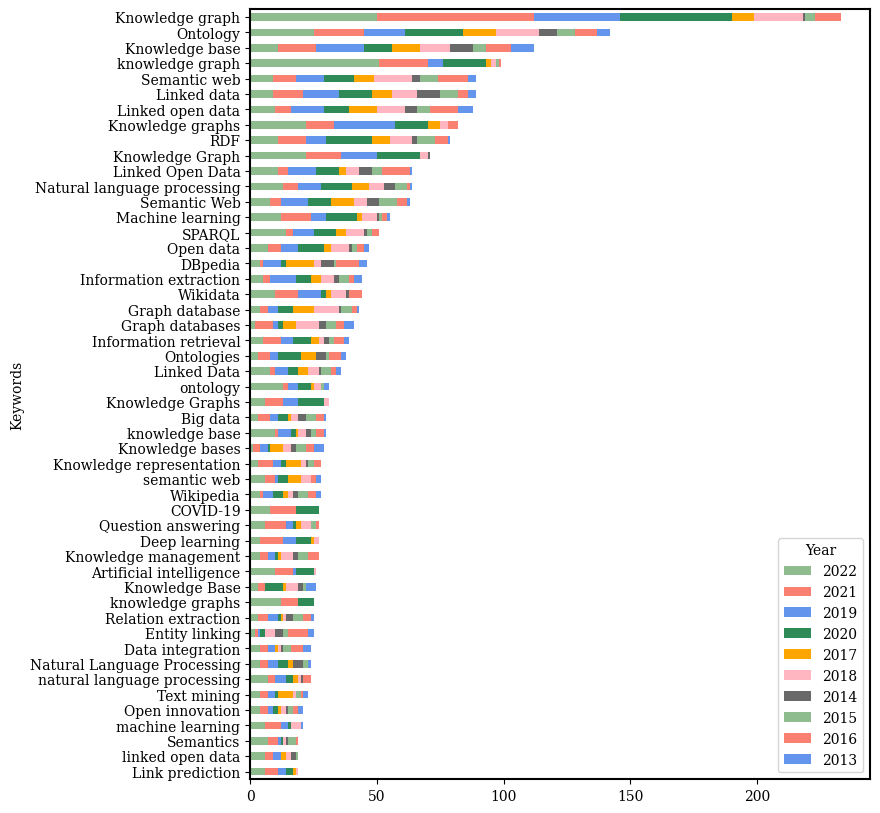

In [ ]:
#Figure 12: Most common keywords
aff = []
df_aff = df[["Author Keywords", "Year"]]
for i in range(len(df_aff)):
  for j in str(df_aff["Author Keywords"][i]).split("; "):
      aff.append([j,df_aff["Year"][i]])
df_affil = pd.DataFrame(aff, columns =["Keywords", 'Year'])

aff = []
df_aff = df[["Index Keywords", "Year"]]
for i in range(len(df_aff)):
  for j in str(df_aff["Index Keywords"][i]).split("; "):
      aff.append([j,df_aff["Year"][i]])
df_affil.append(pd.DataFrame(aff, columns =["Keywords", 'Year']), ignore_index=True)

best_r = df_affil["Keywords"].value_counts()[1:51]
best = best_r.index.tolist()
best.reverse()
df_affil.groupby("Keywords")["Year"].value_counts().loc[best,:].round(1).unstack(level=1).plot(kind='barh', stacked=True, figsize=(8,10));